# Data cleansing:

*Importar bibliotecas:*

In [1]:
import pandas as pd
import numpy as np

**Importar datasets e checar informações:**

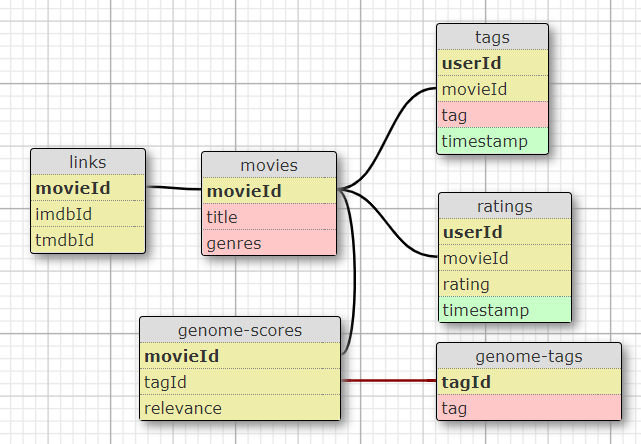

In [2]:
#importar databasese Movie Lens e checar tamanhos
g_scores = pd.read_csv('../raw_data/ml-25m/genome-scores.csv')#, nrows = 1000000)
g_tags = pd.read_csv('../raw_data/ml-25m/genome-tags.csv')#, nrows = 1000000)
links = pd.read_csv('../raw_data/ml-25m/links.csv')
movies = pd.read_csv('../raw_data/ml-25m/movies.csv')
ratings = pd.read_csv('../raw_data/ml-25m/ratings.csv') #nrows = 1000000)
tags = pd.read_csv('../raw_data/ml-25m/tags.csv')

In [3]:
print(f'Formato da base g_scores:',(g_scores.shape))
print(f'Formato da base g_tags:',(g_tags.shape))
print(f'Formato da base links:',(links.shape))
print(f'Formato da base movies:',(movies.shape))
print(f'Formato da base ratings:',(ratings.shape))
print(f'Formato da base tags:',(tags.shape))

Formato da base g_scores: (15584448, 3)
Formato da base g_tags: (1128, 2)
Formato da base links: (62423, 3)
Formato da base movies: (62423, 3)
Formato da base ratings: (25000095, 4)
Formato da base tags: (1093360, 4)


## Análise exploratória:

### Genome-scores:

In [4]:
g_scores.head(4)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575


In [5]:
print(g_scores.isnull().sum())
g_scores.info()

movieId      0
tagId        0
relevance    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


### Genome-tags:

In [6]:
g_tags.head(4)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s


In [7]:
print(g_tags.isnull().sum())
g_tags.info()

tagId    0
tag      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.7+ KB


### Links:

In [8]:
links.head(4)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0


In [9]:
print(links.isnull().sum())
links.info()

movieId      0
imdbId       0
tmdbId     107
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
imdbId     62423 non-null int64
tmdbId     62316 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


### Movies:

In [10]:
movies.head(4)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [11]:
print(movies.isnull().sum())
movies.info()

movieId    0
title      0
genres     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
title      62423 non-null object
genres     62423 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


### Ratings:

In [12]:
ratings.head(4)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820


In [13]:
print(ratings.isnull().sum())
ratings.info()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


### Tags:

In [14]:
tags.head(4)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604


In [15]:
print(tags.isnull().sum())
tags.info()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
userId       1093360 non-null int64
movieId      1093360 non-null int64
tag          1093344 non-null object
timestamp    1093360 non-null int64
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


## Data Cleansing:

### Lista de filmes faltantes

In [16]:
#criação de dataframe missing_movies
missing_movies = links.copy()
#criação de campo 'empty' no dataframe
missing_movies['empty'] = missing_movies.tmdbId.notnull()
#check a na quantidade de valores sem tmdbId
print(missing_movies['empty'].value_counts())
missing_movies = missing_movies[missing_movies['empty'] == False]
missing_movies = missing_movies.merge(movies,on='movieId')
missing_movies.head(5)
#comando para remover filmes 
#missing_movies.to_html('missing_movies.html')

True     62316
False      107
Name: empty, dtype: int64


,movieId,imdbId,tmdbId,empty,title,genres
0,721,114103,NaN,False,Halfmoon (Paul Bowles - Halbmond) (1995),Drama
1,730,125877,NaN,False,Low Life (1994),Drama
2,770,38426,NaN,False,Costa Brava (1946),Drama
3,791,113610,NaN,False,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary
4,1107,102336,NaN,False,Loser (1991),Comedy


### Lista de tags faltantes

In [17]:
#criação de campo 'empty' no dataframe
tags['empty'] = tags.tag.notnull()
#seleção apenas das rows que possuem tag
tags = tags[tags['empty']== True].drop(columns=['empty'])

In [18]:
print(f'quantidades de tags com zero:',tags.tag.isnull().sum())
tags.head(5)

quantidades de tags com zero: 0


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


### Standardizing movie genres:

In [19]:
movies = movies.copy()
movies['genres'] = movies['genres'].str.replace("|"," ")

In [20]:
#função para transformar string em lista 
def movie_genres(x):
    # remover (no genres listed) 
    if x == '(no genres listed)':
        return ""
    else:
        return x.split()   

In [21]:
#(no genres listed) - remover
#movies[movies['genres']== '(no genres listed)'].replace()
movies['genres'] = movies['genres'].apply(movie_genres)
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"


In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = movies['genres']
mlb = MultiLabelBinarizer()
results = mlb.fit_transform(labels)
print(mlb.classes_)
col = list(mlb.classes_)
print(col)
print(results)

movies = movies.join(pd.DataFrame(results, 
                     columns=col,
                    index = movies.index))
# # movies = movies.join(pd.DataFrame(mlb.fit_transform(movies.pop('Col3')),
#                           columns=mlb.classes_,
#                           index=df.index))

['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
[[0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [23]:
movies.head(4)

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## API - The movie database

*Link para documentação:* \
https://www.themoviedb.org/documentation/api

In [24]:
import requests

In [25]:
def api_detail(id_):
    """
    function to get movie details from the tmdb api
    url example: https://api.themoviedb.org/3/movie/215?api_key=f43b45256508300c9a0553da491121f5&language=en-US
    """
    key = 'f43b45256508300c9a0553da491121f5'
    language = 'en-US' 
    
    
    try:
        url =f'https://api.themoviedb.org/3/movie/{id_}?api_key={key}&language={language}'
        response = requests.get(url)
       
        if response.status_code != 200:
            return None, None, None, None, None, None, None

        data = response.json() 
        
        lang = data['original_language']
        overview = data['overview']
        pop = data['popularity']
        release = data['release_date']
        runtime = data['runtime']
        vote_avg = data['vote_average']
        vote_count = data['vote_count']
        
        print(id_)
        
        return {'language':lang, 'overview':overview,
                'popularity':pop, 'release':release, 
                'runtime':runtime, 'vote_average':vote_avg, 
                'vote_count': vote_count}
    
    
    except:
        return "","","","","","",""

api_detail('15602')

15602


{'language': 'en',
 'overview': "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max.",
 'popularity': 13.122,
 'release': '1995-12-22',
 'runtime': 101,
 'vote_average': 6.6,
 'vote_count': 217}

In [26]:
links_clean = links.dropna()
links_clean.shape

(62316, 3)

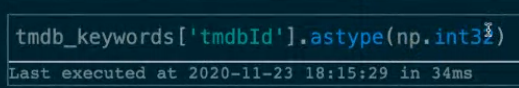

In [27]:
links_clean = links_clean.copy()
links_clean['tbdbId'] = links_clean['tmdbId'].astype(np.int32)

In [28]:
links_clean

,movieId,imdbId,tmdbId,tbdbId
0,1,114709,862.0,862
1,2,113497,8844.0,8844
2,3,113228,15602.0,15602
3,4,114885,31357.0,31357
4,5,113041,11862.0,11862
5,6,113277,949.0,949
6,7,114319,11860.0,11860
7,8,112302,45325.0,45325
8,9,114576,9091.0,9091
9,10,113189,710.0,710


In [29]:
links_clean['movie_details'] = links_clean['tbdbId'].apply(api_detail)

862
8844
15602
31357
11862
949
11860
45325
9091
710
9087
12110
21032
10858
1408
524
4584
5
9273
11517
8012
1710
9691
12665
451
16420
9263
17015
902
37557
9909
63
78802
9598
47018
687
139405
33689
9603
34615
31174
11443
35196
9312
577
11861
807
10530
8391
629
117164
11448
49133
26441
97406
124057
9089
11010
99040
11359
17182
2054
10607
19760
9536
11525
40628
4482
10634
755
11859
28387
48750
20927
36929
9102
124626
27526
9623
46785
400
880
146599
188588
8447
10534
17414
13997
2086
61548
9095
12158
9283
9208
40154
406
45549
63076
11062
13685
47475
2045
9614
688
11907
10874
89333
96357
197
103
33542
43566
71754
43612
51352
16934
10324
78406
55731
32119
11066
11104
37975
2074
27793
44284
290157
110972
32622
73067
11863
55475
124636
9101
123360
5757
39428
124639
9302
11000
525153
249882
16388
9737
30765
10474
22279
30157
568
11780
34996
414
649
1873
5894
1775
8839
20649
10329
8963
26564
8068
8512
1572
13552
259209
6520
9073
10428
17447
9886
9482
19326
9344
9071
8973
15730
47608
2293
9070
682

60082
105045
53023
64802
11239
50850
15321
2058
9450
125021
330
38523
16375
33660
59232
45671
17770
15170
1701
201445
26422
124642
1639
49235
106129
291634
107743
415
47686
65889
11103
11970
34941
407992
8874
17991
11956
266
754
37567
43771
124834
249358
111367
607
18080
38225
17834
686
65046
4421
9387
10603
2142
8413
10336
20737
9413
14585
18519
49462
8834
9458
8854
38295
22073
37244
4961
9416
26180
17832
9772
6072
1669
468
32519
108401
10806
9433
6623
2118
978
9437
29461
56651
10351
66588
2649
14289
10155
75250
20457
18355
33657
55306
68924
36434
2255
28353
9427
172545
17589
3597
1813
36797
12628
33344
25099
45019
63437
62422
782
29911
9827
1959
251481
8067
125052
45153
10871
14398
10890
99002
1281
32332
9770
12616
34838
14905
14583
11975
4995
9281
45928
563
61337
19931
31535
10215
9823
37165
45609
38904
45565
9407
4824
9444
9414
8078
29938
11831
2895
39177
19601
124606
42832
22797
2639
9574
10371
489
167738
293820
9714
102406
531591
8197
6283
279698
49728
64562
4233
191874
10217
438

11886
37853
62204
11040
21849
1621
14035
40771
40772
40773
11498
11790
29371
276635
47941
29048
19052
21349
1832
10047
10228
47692
18561
144953
37426
51787
11663
13485
9289
9264
18222
124853
11165
4203
24226
88875
11379
29154
2039
77915
11943
11481
2690
20565
27141
10399
90762
2668
36643
99
159569
77010
25898
9647
11787
5156
24276
11953
44662
29005
26371
596
52470
20334
11393
31121
293
10998
12235
36094
9013
11005
59820
2924
177
38557
42087
13681
34760
9946
863
31582
125520
22267
55123
5486
10411
41462
1718
28604
15506
20024
78256
13787
54933
9684
9586
41638
70801
33015
777
21887
5652
19664
32331
76083
32628
32669
18161
31681
33666
32274
10402
497
1715
35118
42739
26162
25188
15515
75888
1439
2277
10137
10387
49948
334
30237
50116
46435
94260
22213
47070
36492
624
26578
415072
43103
43194
9563
1850
926
1213
10471
10400
10397
20761
12524
28216
36773
30814
10219
3558
104878
41276
17908
10384
125317
48233
581335
10236
71067
632
11851
5924
33734
14886
26617
11900
10493
16241
27632
22160
44

15267
12710
30502
19382
24679
9599
94440
17170
18509
110428
34604
14441
7520
10126
9602
23752
41952
3980
10127
12702
27397
9748
40095
10651
10141
27362
5680
26386
34053
25884
26355
10675
38982
10130
2617
38615
21362
30690
75889
38500
26723
20443
49365
11347
12144
13704
12505
41963
13482
34014
29739
12120
47818
38617
3543
51321
9604
24929
10925
13965
24266
58434
18197
70842
38909
17126
11503
38558
9717
11966
2605
8740
25497
38560
50203
26798
91445
41428
8337
47493
8463
41974
28176
9493
26603
33172
29095
12582
10001
11352
12500
25678
25682
32049
45225
1648
4105
22711
19124
69828
53150
10142
3064
86093
10134
21291
4925
30352
15142
14550
32075
2210
25005
21721
116014
11828
55699
10551
20713
27461
41969
1380
19157
11465
17190
55059
9085
17819
46786
14776
59585
32855
29185
39787
32059
505
4486
10345
10222
12774
14621
19118
14372
15138
9972
9494
17362
9942
8216
4296
24739
39197
9686
27418
39002
43345
31606
27607
37146
20006
8867
12663
331
11467
327
1548
13403
869
552
36095
33379
196859
47574


7299
78022
279784
32273
26356
23990
4241
37335
34113
22257
35343
30142
17360
31695
76397
40952
38849
71524
43279
29743
41760
31665
40219
45840
16363
22023
171
73116
26639
42124
25297
39274
11564
67772
4202
17590
20787
28940
13497
11852
7303
201
2755
33504
21868
65684
10856
99826
18602
121
25838
1429
13435
3131
2642
14317
11022
24249
9491
2149
20139
32074
19067
53712
25848
14931
11317
4032
8392
31804
81048
12232
11706
61265
42569
25720
26946
16938
21143
61578
20424
4561
4435
16993
18002
21332
640
10599
1574
590
13560
29339
423
28028
41084
18773
16225
28679
262
15395
4912
107693
23626
12090
44233
35172
36273
14390
41209
9582
10628
11078
77633
598
99885
15842
24711
43886
11222
13199
8073
26393
15278
1484
14667
47263
18692
15734
34148
20813
53027
18894
26252
24742
19415
41927
5968
10727
9045
9082
92348
80965
14469
55909
20663
31916
61807
20639
7514
42645
29463
42795
39349
44164
12253
9358
1647
9027
125945
21189
10894
28528
34783
34374
12490
26761
35185
15802
39948
8286
43028
65300
24129
46

37044
42989
17047
10591
1586
11169
49689
266687
66660
156
2778
10433
47168
58995
43236
142168
40752
924
38
11081
4377
16941
1720
9541
5516
20304
11024
53734
553
10544
1487
13700
11137
11358
13573
19084
10733
14442
2122
25300
14576
13432
26636
6844
923
2587
3591
28026
26176
41857
78364
10338
33839
133919
95548
50549
38978
92331
111883
42245
68347
89488
34082
22999
20278
18698
47201
12239
4365
86182
45862
65066
42228
16561
54655
70779
10843
2098
65332
34303
15673
393
7220
33823
163676
237
126117
10096
9509
19016
60645
10710
11058
11141
10625
54807
11025
7131
26899
30125
16428
652
8440
883
38018
34377
20375
10375
42015
68440
12503
11864
9461
57811
132
28276
18329
17993
37447
4339
42108
18513
26517
28285
22137
5247
31676
49622
238952
10035
502
41965
10347
1373
30959
43341
20561
13055
667
700
21594
26976
36670
18872
44864
31993
43818
28290
24650
55086
43525
20640
50363
633
5511
41003
13936
294
11507
17538
10435
1162
34328
47108
47140
40930
14684
58467
10261
163869
13937
25355
29601
66115
11

10227
26039
42701
42702
41212
26204
5767
42713
27277
9929
20873
29778
18193
22176
42623
42634
118872
50789
29266
27983
5638
36446
14801
49397
42607
40430
38096
48831
24152
1846
21323
5928
29748
105627
85255
26525
31672
48408
33205
70327
2860
42589
71943
31304
64828
38222
26606
36404
42528
20848
2998
31906
31767
839
25109
36194
16328
42500
16154
9394
74689
36850
38646
84285
18287
5822
13041
40732
122677
121923
18250
33020
89417
12089
41471
17810
23148
80911
87417
11378
760
27331
1410
38729
86889
31943
29142
56764
9474
27084
31596
59189
38714
31587
22307
62330
28498
21964
21035
25473
118121
32044
62761
30702
25627
24402
5558
3043
36665
16246
27977
42448
42449
8327
37627
32940
31656
29859
5618
19174
9385
28209
1835
70259
10711
19740
1829
43430
32042
9652
38099
47313
5725
3870
1660
83864
133008
6476
10640
33324
48205
46978
26842
42252
73100
11558
5651
43751
14336
18775
12535
1421
62847
77360
12637
54140
38985
61280
16378
72412
11935
13481
24998
13514
113777
156235
98851
29107
45691
11537
4

50536
15719
28455
15938
2095
18503
22553
26762
34308
43809
11588
74
16659
39464
28270
4889
1667
78293
100196
13014
18257
7233
78344
73376
9009
1553
9738
14278
55650
125360
9522
14922
77593
17599
28706
48232
26654
1826
43100
36484
21886
84079
43367
21115
36401
38530
38516
14646
10476
11309
34012
21366
33693
1635
13341
1696
1665
9775
11459
10048
11648
15258
123049
42719
41776
72899
57866
12497
5237
16320
19112
37640
193661
12259
308
25074
26935
5319
27449
85783
39946
54139
26579
40254
18882
42689
6519
13919
25956
1444
11453
9913
8292
13922
24461
14166
501
31542
28201
18165
27292
57103
37204
41279
32051
37284
42741
25975
17824
11328
108348
15907
68850
46825
22965
11848
34921
27217
25199
53857
306323
85420
43313
12147
31977
6957
1917
79684
16764
11460
33459
14674
14134
19404
42034
35304
94529
445
74840
9564
102081
21290
20874
37185
17186
14175
4442
59882
22741
44413
65513
13169
9042
17926
15022
1985
9335
56214
9007
9777
1830
7182
10092
340
1546
23703
47488
575026
15155
78734
51277
61675
59

37513
43976
43974
83346
30081
17677
56474
42066
11958
192675
5177
33673
18437
38432
8270
9955
16201
57241
10172
1683
10107
1267
16018
22311
13249
175027
1272
23024
1590
32390
9903
28433
22549
10798
47848
102227
13377
14945
11515
7183
8271
1534
13158
118536
23397
35838
20405
18777
16392
17422
63951
32627
1407
81309
30694
1441
6145
9843
54659
48994
10294
1987
13067
30307
1268
90984
21810
9785
13280
14636
559
1950
13352
28304
20553
24397
20525
13894
38907
18549
37933
20025
14240
13574
13569
49081
17439
13171
16447
4977
15008
31866
46875
27904
11705
19947
43969
2269
11798
28772
1919
4964
2976
8421
1562
13159
14547
11205
36676
38077
43618
43397
25395
810
5723
285
12526
3432
1872
15568
14208
14207
24200
50153
18902
5488
8748
3489
55823
13979
12225
298
10832
36143
14064
13742
2241
39465
12561
36679
40765
30574
37959
18206
1691
29617
1990
170261
22049
9408
1979
14043
10288
74055
45664
1991
43353
9952
60400
32004
17035
17320
21427
17660
1294
33294
57425
42700
12713
25875
12543
13120
71822
13807

105371
6936
13406
14357
185156
10202
28564
23604
13973
4148
194113
17845
13827
15676
15584
13971
89573
13813
13180
42366
14306
8049
20028
141971
8927
12429
53519
53518
70191
51808
18151
28256
16205
15331
17287
50988
113916
29741
29262
87790
26758
25528
8942
13690
16409
113921
14756
27244
35945
54406
10596
60547
368955
13944
10199
10521
26235
13635
14435
21966
52886
37373
170094
260528
13177
34696
14139
16999
8280
125705
36746
36402
317
12437
2309
86363
60542
162865
47658
14076
13942
18543
21029
50307
49511
27440
13825
250093
15227
14560
14410
13788
13429
14871
35077
14353
27447
14254
16137
17803
101838
214436
80193
169869
56816
38205
168261
10529
75880
160783
62753
417285
14582
46595
50318
253116
94533
44052
602262
63938
1977
46725
13510
15554
14836
48350
97915
15003
141971
24194
14851
13455
4959
10362
10184
16170
36764
111459
37309
131729
52105
60539
28196
1560
85394
15189
133328
13492
70089
4832
135938
7353
14711
52512
98193
49600
24171
5677
44618
16804
25405
73953
1961
15148
54838
1

33395
2974
14016
94706
26466
49807
99749
79509
46623
52863
92283
42137
8952
33159
26137
71825
103201
98246
33630
51675
12169
50663
252407
43333
42212
33728
27989
25983
42683
271677
46423
24469
11518
7344
4887
51022
31578
18670
25293
59013
32856
7978
60086
11324
81382
8898
183946
17334
26715
19311
38448
20047
55522
13949
24253
15324
32657
23742
36457
27561
11439
42586
26963
32868
30298
23172
30128
29381
42295
41894
67736
32124
26428
56931
12273
22805
79519
20083
15357
408956
18489
120280
19962
29427
22971
45576
23023
29785
63195
20871
14235
71370
25967
5595
32092
10664
17473
26022
12155
40623
22972
119819
29182
17277
24424
26389
61880
31515
20618
23488
26771
43012
27583
6883
26390
34016
25941
20471
18514
23169
18704
12718
15360
19969
85521
36233
16350
15846
14765
44363
94182
34592
26430
30903
48145
29426
217632
541083
195204
80196
31299
34563
27573
32678
12834
31723
49508
26558
15483
31678
45921
33788
5753
43495
32688
24973
42342
168171
80595
66953
16436
31867
42451
43138
4933
264241
28

118533
44441
43973
50241
37514
49322
43930
46660
170986
96366
44264
20526
44009
49684
104720
111470
43318
322799
42888
130623
46829
52445
84086
44129
43855
23108
121006
18029
62567
37080
30023
50701
250810
107592
83036
50673
30548
26138
40149
10817
31300
54178
8464
49797
39988
481
36115
31283
4266
111390
32609
46788
48203
25908
238362
15740
35958
41283
42984
31104
81219
27072
35138
27585
48204
53156
84827
25434
23282
38705
39451
38745
50071
107548
39839
102091
112674
10097
78320
51143
48748
52208
56812
34576
51357
51358
20495
80054
161512
56320
104394
19887
82549
54430
46207
33107
48127
33870
42297
82622
51359
37866
51739
46838
38409
45301
32407
44742
38054
41515
50420
31850
61943
35392
20531
15302
31694
163659
39967
37533
23508
18381
6474
30914
56787
64212
8995
7210
52696
16987
46138
247112
247124
61212
185720
72413
14639
46689
54660
23830
55584
89126
42243
51360
27470
50704
53079
22007
26277
165402
102144
56402
40805
49616
124058
51362
25770
49009
46528
84274
64605
51933
198317
38742

45048
85828
108844
43511
28373
73532
201405
27288
73062
89271
43637
61202
47760
55785
68341
46909
31167
30867
55847
65317
103475
49974
64524
35125
78228
65081
57726
36236
63327
61404
76684
32958
45806
38543
80241
269518
166798
36513
27881
18093
86920
75865
124630
87063
5473
72049
46534
55890
44950
101772
154623
38437
24428
82260
49517
60243
48231
109886
74525
42077
42266
154879
59440
85821
125736
94655
131732
106825
10316
65283
173341
91961
95949
84299
74725
49021
38743
67885
37822
52058
58699
40807
52837
54469
41800
85916
81401
63375
74879
74643
17658
57714
105757
13687
72419
71905
114060
39861
123723
115596
59852
85743
100784
41822
103590
55863
47182
70803
91094
148284
56345
148327
129427
60421
27439
70636
63907
113432
33592
58402
30043
86440
149507
126004
63025
64720
125039
70588
48778
42707
31116
56401
129942
134209
117404
83633
69722
61645
218389
143841
74810
76013
54700
73588
111625
43460
52847
80122
83015
225951
47496
85365
11383
28858
43981
80115
24566
125553
61683
58878
37239


93188
120271
78263
38034
54864
77174
82650
208579
97088
265579
580560
79224
85836
84203
84184
293094
121210
109513
109584
73846
93934
83384
76360
1556
118624
49526
83539
101482
30785
42152
71864
82633
57330
71668
71725
89691
31074
84340
137625
90061
84334
77883
119698
48034
110491
79694
83540
108762
376394
134012
191402
83403
239368
39369
12677
79034
27349
40629
67429
83660
84174
83686
84344
53336
35623
86785
27146
189472
114150
77948
84281
46493
112090
85341
130458
89708
67166
59967
84188
87428
26505
15895
28218
97795
70808
81215
94108
71827
149145
126278
84329
77461
84169
96973
16640
71679
87825
112408
88075
89455
148857
503936
157903
43599
70090
74103
84347
100529
68722
85339
593020
191600
49049
179251
60599
98369
20069
42399
129535
84190
97933
106124
53909
4822
55723
67441
48654
19823
112973
38091
122930
77016
52432
84348
47059
84892
112007
103663
103328
111174
115712
52767
91911
88036
51996
75638
82675
82390
101803
83589
38719
76703
17165
270372
255948
88273
82505
5422
83670
42203

23705
57849
20181
156306
103731
42587
109669
66209
88176
159011
95755
74257
26693
31700
101501
172631
53619
139463
127728
48254
53197
112823
108419
94901
60540
101297
72525
39889
82501
183171
86023
64682
26293
100224
124085
104871
128847
61904
8768
31560
137474
54138
208700
118059
60270
116741
23112
48227
83664
82594
235373
28258
39386
42601
21862
149101
155596
149155
458
134397
139933
128216
16150
39333
27861
97686
38875
168676
64143
20803
133082
83382
83900
77987
109439
81576
82992
116711
86282
84038
2077
54120
152780
42151
95771
55657
43357
118931
121725
100493
121986
18146
70757
94841
119675
128873
130824
81534
60152
39193
189650
123103
166666
219781
176182
51856
109455
90873
142983
82700
185291
111172
28271
53405
75656
77805
160758
54894
68297
22911
74513
98248
94326
43938
85431
32596
42714
124227
63212
40226
313972
97609
387042
63923
57981
92620
116811
147773
101998
102331
183672
34977
127884
111083
91739
105526
50158
53392
49521
53411
156700
65521
85047
87567
128215
121873
23380

174671
157384
136727
185008
199423
92834
92647
173465
19199
111421
57680
72465
69746
114888
104086
222911
250769
184846
65374
117773
76268
100409
207769
137968
12758
132201
104067
173185
81657
470031
42262
42456
180383
29007
96482
218689
250117
95093
100241
44969
44693
157099
181886
236583
127687
505357
107203
112575
216369
171540
33031
30123
186992
130150
184352
136437
100898
236399
128006
33280
2180
100063
21435
90728
157841
45266
11927
59118
46136
242033
47831
44516
118761
177888
234155
170234
54279
26947
160068
60025
109949
104211
144121
152760
150093
137106
32996
106573
136582
97794
477912
97020
209247
99608
83665
61501
249397
83564
45930
217987
137566
2594
505542
253445
343435
24685
49729
75090
43191
42325
219318
87358
106828
239155
74461
16032
4883
190341
174688
103717
205384
144336
120143
25519
141614
17794
422906
33801
56441
146490
140873
141043
246320
84362
67793
122435
143049
99367
37585
157834
226857
137321
210913
83727
43042
206822
172120
232731
117426
226444
31445
81699
1

184322
244772
287590
27740
117992
249012
165747
83188
121975
135418
88285
27286
71181
230605
294854
32109
72472
33814
29328
96600
72114
244219
179799
269710
196325
87151
198663
136835
244506
54336
166643
171061
55222
13434
26376
179519
79016
343693
270302
169917
223632
282296
95966
261855
358724
265832
244264
60859
124019
85633
215935
245859
264767
285026
239605
112220
29835
276843
154653
32891
279967
211879
265189
13914
2195
5970
12523
8948
84857
117464
237202
127105
94069
42553
111479
182799
264656
68004
230779
127798
87621
54561
38654
177246
257451
103701
69559
251981
254904
18374
42648
42493
157825
116351
282041
198182
292483
284427
242758
60828
64835
471804
270668
170687
149871
37702
241261
174324
219054
199415
27212
110887
84540
205004
20372
102913
102024
209440
239678
93115
179822
53042
230295
295507
15916
142375
123742
267480
15478
57812
296615
126141
157424
190859
263855
246403
37630
254375
210911
59106
65485
58509
250666
42581
43259
140513
271397
215928
253312
250546
158997
8

110402
255940
14228
39195
78247
188832
305276
190000
245916
183412
241448
4683
96011
150108
48443
131913
273746
42869
111765
39928
116762
55322
65275
252511
114538
23076
46570
151024
89652
42438
124352
99361
96477
74018
55689
3541
74417
15261
241953
151026
58702
128555
42499
106970
42441
38366
121510
105398
95083
28844
118802
145677
105424
260893
105906
268662
186632
101231
285423
253272
215016
69040
84425
247437
289728
214086
43441
212950
58414
74071
122917
40456
273895
227306
246080
225499
305127
260896
40130
121901
54310
285120
146559
18450
93142
96132
293962
29482
102949
105078
98273
63260
56431
283281
103678
250538
308165
266782
298445
240982
241574
118134
304336
146121
106678
15603
22285
83007
32624
76750
29293
72389
67314
40339
42710
93911
228634
128264
46467
74681
277547
30545
95174
28852
37229
29542
9940
118751
60649
23523
24388
39885
99537
47057
65456
47491
121620
72153
106685
136106
60629
137347
219043
295144
20000
28652
295698
292191
172391
252171
30174
280218
182528
20147


79103
57016
113210
85867
99234
20753
94751
29284
239706
257315
70734
116639
67275
44766
68202
94228
70098
25587
38269
42305
196385
39829
57943
24554
146852
56530
47003
35668
62108
76765
42468
13013
105902
70810
106280
52878
38932
42904
42783
65496
251768
259074
70877
42303
61168
39344
34128
37404
36421
86059
18920
150229
256740
42723
58096
36283
43448
57258
49848
41589
51438
21518
34672
26266
9973
48844
70587
78047
142308
149910
79121
71376
279578
173793
143963
136984
26042
60853
67659
30027
30028
157925
31277
73548
77874
133446
210059
240913
249153
283105
58012
113215
239350
113209
39075
89872
174769
274060
246218
102078
194806
133491
84906
35986
131491
153228
116373
71202
115317
190071
224937
38382
49483
85429
80985
40858
69481
215299
187534
109933
149634
5201
89743
212673
64130
47884
6319
84312
4529
112080
218443
79190
78094
56146
52790
66812
1790
140402
49727
47882
42985
112648
36884
44663
47883
73424
98293
260535
90376
81010
44699
16089
23022
35405
49429
63512
4968
79521
16997
605

203264
160466
150456
108181
27978
42752
17129
47312
180891
152130
44128
91737
53095
62188
50926
61643
98549
94565
260203
39042
126031
46190
90363
33843
43249
112885
52323
75799
37053
174340
37294
68191
37408
166626
36631
43625
15898
188357
55762
82181
33002
98648
138699
24084
40468
44974
75033
2199
122083
34945
70422
5601
113003
48897
104729
168045
4940
77118
70916
56412
38556
11719
63706
113850
85768
31362
31919
214181
71357
111463
44697
44989
208495
92635
71511
46869
75012
37123
24002
23200
84727
56596
173299
83802
46193
43377
121230
67375
72984
18571
52355
31101
113175
93263
26888
49733
43365
42754
67328
62589
77845
196693
68744
39166
78028
139367
109898
46562
99377
28284
36634
44023
86075
16922
188507
67521
27966
147618
42128
84508
101859
102195
80200
61855
140166
82243
94881
50117
47638
47437
83579
61613
38472
37306
103938
78504
45599
24683
60965
120522
119645
23525
105406
72455
46580
56860
14053
81724
175065
127614
167956
253266
233487
180644
302828
281298
105663
61237
99210
9857

175287
90944
99449
50425
300176
274805
228736
29858
260921
107325
316183
287509
95744
271164
117913
242240
69974
42590
218262
261985
158150
121822
257347
70950
145838
41099
284765
264589
122221
37126
73551
173635
285176
286873
50714
285270
126331
44690
92309
81365
47110
58865
208028
325358
126433
84644
49116
162821
4274
42145
76519
37455
246049
96987
243881
306293
37858
129311
195191
114155
186970
179812
31355
45417
65364
13842
179150
42310
2993
125141
260852
193784
278632
121493
6547
186975
229304
25320
146578
251987
165864
245025
256591
89385
25745
221791
288789
246127
76532
254719
228165
234212
28680
27706
69578
158647
118390
104935
90015
41934
204090
21742
119569
17041
80343
85349
59596
38399
327924
195382
37028
211561
26296
146596
89351
104549
268238
259183
38082
96631
191726
159652
253284
66584
57681
282624
113655
232610
146380
75086
46448
198326
121513
196421
198772
14505
117212
113300
89656
281249
82430
87365
39925
28801
77399
95029
115972
164578
28771
93181
201124
40419
13643


155752
167101
3164
107678
171900
38059
30034
52681
44409
265741
43789
12406
95493
281180
90722
134693
108352
46915
42495
91472
38298
52212
301229
86269
61865
85184
274415
86258
94739
299353
92716
186682
85726
70247
128043
147264
185843
45679
233795
291558
47944
158724
159774
20036
165321
275244
233844
66765
28855
128614
91683
278990
270400
259453
214464
38154
35703
43913
27693
164331
97829
281778
330431
19599
14572
260310
248087
94205
225982
139862
75066
289720
294517
282631
32029
96337
55044
85644
84511
144498
107335
290865
75989
63056
49823
154276
241939
246654
12697
329540
18068
278316
228205
272418
142115
52333
38035
266331
45873
284289
325382
284470
332759
228381
290043
254936
21461
295592
315367
313074
114003
128207
35852
201132
28904
194883
46808
293863
297702
250756
132342
319389
174615
261906
256924
119052
30104
36754
126081
129084
85356
143525
21891
333089
70758
95056
44216
87503
198044
336018
85966
26503
39992
48846
37932
325113
309304
248611
131455
39185
54735
54732
265330


75442
35995
189334
71063
105616
77140
196213
81871
61911
221527
99916
63687
42414
58185
56260
195413
62036
48937
323445
105778
83584
32728
46278
44694
79554
176163
174733
257039
277597
131634
272878
257344
262504
259316
270919
64862
321315
25506
60363
122268
48885
61669
33057
157289
94066
42497
43248
99370
91266
325365
186079
17189
59908
45133
286407
250653
72845
138223
42293
338107
215776
59843
35065
245017
31073
26469
74849
220287
251227
30485
339367
259997
253309
289239
86210
16530
190868
316310
222297
3056
30762
24020
62527
103014
39831
71887
33871
28601
64265
34766
29742
34765
124134
70772
46004
124097
61717
14912
200487
92943
280996
22520
257109
23808
39978
175606
63774
63178
177973
80374
82113
43294
51912
136695
63643
56920
220177
340961
58701
65479
158062
158065
54166
73741
201383
289651
280465
11048
11053
197327
38528
11055
42573
84066
65733
81729
95756
200938
76112
220782
128121
257279
113284
220731
315893
338952
80177
314996
328111
172014
60142
88018
85739
319188
57011
18839

17022
101752
319090
129067
41141
203801
320385
293625
89596
207773
42141
67976
172785
143328
130976
38246
44952
63971
240737
74546
16185
240501
112878
137683
281443
134018
104126
254170
163583
36501
82634
323027
86515
83785
133738
30442
253473
41950
297173
212752
6441
77852
88354
12638
182117
14520
62557
257131
219248
87846
54729
14983
169644
53967
46390
87884
128612
83583
199056
41342
115448
331737
286372
337879
327294
321919
338234
309883
215023
188758
255798
287689
333594
285783
300671
324670
273169
74645
134679
255627
319167
154980
277582
156084
343934
66346
127856
48412
29964
59211
104974
159324
139341
88658
20665
308077
348499
98577
348502
348503
348507
348511
301074
348521
320104
348528
348530
62134
348532
57311
77000
85038
24168
42679
56041
300238
139504
147868
63365
133788
23509
73869
77944
22182
56844
348533
56014
59570
60650
348536
56400
58531
72057
123375
49850
169692
137315
141810
58013
195544
158182
184681
270479
178915
348540
182415
201010
58204
250219
249457
191820
1537

179553
81438
210050
282374
193502
81760
228066
47736
84401
185326
160907
118553
74128
19247
79633
260090
69403
58008
353182
4705
353208
274820
26189
243059
231009
339327
91624
120068
287628
336251
325263
76871
353898
336203
306543
316170
88941
89372
251258
50341
198972
65628
116236
282905
297505
289679
270463
270470
192431
317655
82567
136627
31169
228039
18870
64735
99762
75634
66127
354128
330037
94282
37091
278388
264569
354556
39915
265640
49455
209764
136772
115873
127239
246449
116155
16566
20931
42949
250477
189621
294220
100024
83415
98203
175386
239519
33787
58646
74430
2988
167583
27328
212051
190213
33551
253876
142106
56968
21927
249897
25713
21178
354544
150157
66888
10492
121550
99863
245305
73430
46617
107076
19505
97991
85972
189723
180114
41241
87388
177190
158750
23245
273106
120672
136752
170603
198143
58625
257447
76086
66568
299359
72639
12598
134480
136694
43142
248639
139349
240050
28479
322784
207850
135504
290789
43710
344591
27306
28646
27351
82466
64218
97187

83217
2969
197257
273868
231304
36817
337014
47158
270487
214717
32528
14847
39285
136294
29760
43713
45823
44008
46713
362185
192767
250572
350641
353595
328246
320589
319073
184608
107331
56155
140642
84658
139646
119256
153410
214219
89728
86318
173800
160652
109552
238458
265760
84114
188744
40826
237854
26015
41434
58405
111460
128655
81539
318917
237303
79580
278296
52248
30933
83795
102079
124088
137420
252895
54297
262434
10094
85170
70553
54612
57662
120844
61656
58106
44848
180424
175005
20381
97108
91001
125527
78115
68559
322438
158939
363439
363471
325848
335724
334328
355600
316761
257117
362373
341886
291151
14091
69571
46565
39069
84984
49456
74657
122787
107929
196482
332493
80443
290024
136572
257379
161790
107035
74656
199330
291866
38201
298931
40692
216363
255784
291336
112162
324293
299715
245855
341051
220200
90079
103210
139637
211144
171952
334536
113097
320343
143602
267178
331576
292992
359255
77821
203226
156225
24567
106845
360341
171729
48761
360638
329819

278867
27560
81274
50652
170752
360203
270766
75140
328739
352745
289419
90458
57991
269297
355141
58000
293395
329868
281380
104945
198531
56978
75293
57310
56970
57914
359185
346089
204137
104034
199011
60018
56166
64948
60191
59857
64032
65629
29951
78812
200348
121464
8430
199305
61217
75532
155956
42579
56922
78862
293264
157827
337995
271983
70449
36324
293189
19548
134881
97755
230415
226787
228293
104173
42117
56141
160041
61208
336004
368256
246133
211166
343426
51285
75142
291006
276536
200823
327383
287426
23857
332502
266058
40635
73132
122368
329206
250029
198511
59959
11530
207402
49907
62367
67177
107812
197198
198474
183964
24195
71995
274131
62034
220565
217648
63074
60175
24260
53179
58833
52557
271388
266563
93863
33126
130719
39850
79212
332534
27721
193544
297308
117340
277153
33624
333348
362136
15768
73492
84844
318972
232739
92326
297466
330007
134155
84106
70815
65830
84368
237672
60392
75143
257200
214099
49562
66175
184202
69592
85648
86721
131898
161048
1010

201386
110713
341517
18432
282879
315534
339944
40241
58431
31078
49674
58887
172767
264943
89145
73069
203763
249260
151911
163890
95134
99729
100100
181426
44459
62752
153717
71431
289673
337208
58213
262234
88933
90349
121716
31992
302026
174686
111868
182035
102288
54951
75986
121197
7193
272095
176253
272667
49172
219860
193688
182925
83880
58791
38920
101209
220003
212375
26199
175822
176411
50208
121161
21167
66068
84479
20226
132561
44751
68360
68444
276608
12135
76202
61935
17486
69740
123005
47587
42748
60775
22034
150041
66066
263582
80469
56950
299856
20388
24524
17902
53103
80153
210320
209414
139270
10509
52738
22454
141145
73628
86482
164366
94630
280437
287344
374698
218238
73222
142085
75578
52260
15994
36712
182545
35639
63044
56597
74436
255647
215505
54832
67446
111480
95363
163879
115082
169946
44478
2389
47157
62659
215908
185837
19930
122619
48848
87469
27548
25311
211220
124395
316985
199458
279149
96509
242499
6915
324930
374416
65777
281531
39288
68439
4459
80

313108
382155
74919
139635
44528
127329
85580
9939
379873
137269
44239
20534
21665
166027
117341
211105
115153
72051
361866
159069
127531
196852
135199
117099
336735
277229
232817
66702
103212
158780
184395
195557
195562
195535
195561
195653
195713
163111
195732
196044
202020
156529
184522
161898
303982
228184
153695
300602
41093
86441
50667
53871
283424
57296
324317
23729
258749
373878
371645
347064
347847
354110
20132
97341
22429
20390
58725
39217
83903
15978
40017
276387
20296
161212
181267
272220
301687
107391
49496
218150
371442
220500
31364
129882
202253
114006
69346
21555
58302
97361
243416
237422
330430
140231
65719
20623
48318
129820
362812
170856
45886
118635
281122
149094
111988
249347
278269
44351
46857
36224
88860
219693
86077
64225
47239
111248
201639
44066
177564
87394
217247
27598
245324
78547
73094
175380
129933
94807
71117
4747
178907
202662
20907
74903
80080
31450
265845
27671
138093
69022
64404
149455
69917
126610
84848
52701
10749
131398
62759
336970
155052
92988
4

258800
163018
377799
163791
64674
374021
379508
301494
47247
48125
167021
43796
37441
38404
73672
71921
143839
172585
315777
365805
72278
83907
110468
329815
269151
12781
63317
272160
226693
370902
47845
224951
242546
300403
161382
228109
302688
125751
327528
367108
326119
203124
167410
357706
210302
208091
136366
384205
110898
381722
314029
38706
24577
78185
18188
46776
101013
195029
58559
378137
387054
124993
42291
31184
359440
297806
186759
356326
40208
342521
132540
337758
334922
375742
336011
290825
239103
157005
252552
72750
48613
333663
250852
201729
154786
82151
278660
75577
97399
123680
34158
214170
341745
276157
122544
296360
220404
291714
41317
257044
165344
44256
186991
254952
347848
239367
178870
373985
4284
330453
60410
340567
159216
33419
121013
110306
63701
76746
36818
242631
134238
286743
207178
85231
174765
75510
122325
249969
66060
372691
178447
86497
376716
383535
90110
297784
365002
68048
261899
261112
16017
145547
295627
182824
271664
75027
379291
338913
304869
25

371451
334557
315669
61533
57218
109587
15303
110501
70527
108835
33611
55125
33604
55130
167548
57186
102337
64924
122800
112092
40890
391626
319632
226072
45341
125696
259728
221241
341559
73680
136902
71617
259690
361733
66944
284154
112931
61711
85780
58007
61532
216138
16280
56294
15068
354776
280874
63483
250275
264555
84741
58813
299730
218898
280690
188640
120942
22315
320822
158009
250184
89868
252990
353125
297239
319396
87018
53850
75897
13099
174108
138686
297961
81765
80582
52406
88865
370662
86063
18152
49264
78573
121170
296231
279142
117102
74113
338381
267292
290773
220290
53104
117407
119430
102223
297400
310952
296370
126760
290098
260826
149900
48268
260830
260452
144428
157964
197849
208198
358908
289519
243306
241259
109752
377432
369052
289523
317114
315134
317121
267935
110777
217487
176715
371464
359871
334534
238997
86522
241618
68213
68208
241619
143431
112722
182979
210250
223702
13125
283827
141418
385390
387398
381615
377428
374614
374609
374739
374607
374

184897
257031
28305
223367
120847
192811
157417
164205
156335
28048
26924
59703
23255
79596
49439
80655
50688
42523
182777
286208
75796
30638
284464
77864
281475
116580
28750
196486
3521
70028
42591
125784
12602
76131
109089
42717
337903
85669
185752
157286
109636
165644
104621
110729
387444
79106
108432
35165
165401
2719
101662
18560
73772
183073
76199
3015
317035
111306
84713
184468
38494
138956
161796
221671
77119
104185
162800
45571
27144
139427
28439
26921
235683
191130
29476
28359
293744
137740
232321
352694
376659
338766
310888
373473
377587
48995
330070
390734
383869
46744
47535
388192
404073
67617
397365
208173
190326
140423
347642
84275
393184
62592
140894
27154
50033
207558
63423
300669
378570
333846
340224
288504
376658
405653
150987
403119
380762
370178
340712
391995
372288
63859
173385
113262
158741
82929
4288
266036
60700
407298
348955
353732
388347
365709
68119
42248
238250
238240
238246
233905
144299
135073
194706
106618
164020
123628
117746
47402
111492
120729
198491


81537
52247
366864
347762
324174
381028
241928
376166
35701
329802
347666
95008
39922
81477
213212
30788
413806
40216
29459
72733
18486
357540
340677
27370
403642
17244
382892
62852
61528
294800
360389
21481
63809
404461
122794
296867
374464
258230
227266
329865
414547
40217
14907
391618
390353
378379
58443
382143
223046
332210
29570
374671
413011
191536
106070
47177
147890
393134
170967
413017
399621
339116
382511
91045
57924
24799
374452
392812
75004
132712
161908
98277
132608
73160
103785
38156
70666
158921
381081
376228
218850
416867
197772
251619
79779
1609
200119
325385
336776
227933
311215
250278
68972
49351
345170
286313
125276
244331
78453
73306
122539
180556
34745
68670
73754
23143
211816
418072
100329
52244
182548
153104
60504
40009
291543
268853
73823
52204
97846
42793
62722
44805
235416
160410
403434
375366
408537
57278
245627
298583
384841
388764
388757
124501
345670
399300
378084
276624
377447
408620
410729
379300
413198
411268
389187
393559
387845
393070
334930
380007
1

301010
418691
217763
147763
311362
210653
38101
244201
412213
406431
389044
345727
230031
362884
64191
185644
53035
100829
138014
33127
105561
206397
123279
65345
275355
88496
103181
17712
34516
26016
393731
362226
421111
403357
311324
283146
56486
131509
99004
85944
347870
429126
401060
413417
352490
320293
85681
310307
346658
89463
136921
36123
59046
409447
332746
59356
59357
301849
20089
380620
115877
115881
47121
111708
115909
98596
115903
115896
114051
115895
115894
115890
115889
80296
29338
29333
29336
105093
115878
83875
356305
229065
249931
411201
422469
335797
413543
413547
44746
297814
1608
203059
365544
110549
290911
298522
323690
38610
411019
225577
393003
116445
89540
68636
207323
400753
380013
360022
381935
52415
272414
340194
411632
404279
216550
296288
324263
42377
40061
407204
326256
423377
377275
396965
31160
294608
380731
162139
257331
334522
412431
406125
391642
145593
418990
320892
40573
426958
277806
148864
278851
23207
425774
408290
423093
341443
89307
324440
397

244046
163924
433056
384581
414910
332168
228455
155107
172972
427409
399219
441043
109080
114370
114372
114371
105231
293570
50253
83090
83091
66105
83088
427416
433583
398395
427413
328327
319971
322785
323688
355984
429803
326553
327953
329286
323552
337405
338689
350762
399798
327352
340785
342546
345176
346473
348601
352036
355335
359244
360408
359459
366692
361750
362988
422548
362108
422550
376599
368999
369665
357600
369796
371347
374174
371084
179105
295891
306218
273128
281590
265394
161939
306199
37354
297482
24440
219898
170571
59060
40748
40120
17695
238255
400001
375355
336000
415671
88374
439263
442752
393732
427451
378018
22817
16532
360328
443007
242409
255802
363618
351097
405204
390409
442491
47291
173577
433082
42539
110001
381009
27231
25533
24948
189098
68306
90231
386123
289732
28602
108435
434661
90232
86658
410988
371463
345909
340101
433356
410117
354285
340676
403252
4369
356401
422553
403114
53163
246252
70740
393443
309028
422960
416499
317560
75944
56947
3

130300
111042
416951
338227
252034
444707
198646
11396
274991
160124
49579
38332
49574
126555
78595
57204
152989
4644
349177
2132
50332
23594
325111
80211
62399
70172
16058
107808
62196
201429
55740
411518
94340
37022
10960
32888
26510
35320
125302
55733
55728
18043
44015
19675
55738
55734
82377
44762
318348
20473
20564
15075
38966
14543
42306
24881
55694
59807
39084
71288
55769
44593
10572
34167
45249
393196
41301
30118
76059
387999
26264
256109
347630
15285
94532
86231
177085
33586
47893
215579
18866
119457
55715
34203
78387
50492
263029
328212
44417
209379
16875
20148
19580
299513
394045
80147
39026
17871
50161
76706
55712
83079
63447
225762
55710
69621
100634
48281
317925
41709
127497
160234
257439
74415
48962
46712
54144
112700
351281
296690
400902
390059
356747
24791
111913
383001
39962
20946
244575
8128
429070
56525
271234
177950
332512
347382
246438
80178
59529
248223
302150
260522
45887
23764
250251
206591
216046
31772
398920
400796
429107
164144
425931
448448
214256
437941
26

157414
46203
323901
459928
451945
258514
382455
217917
42616
74384
64043
70207
29458
160788
38286
73649
38397
238008
373546
381019
204997
269795
71133
57996
63179
398924
175910
417500
399170
436450
348318
399823
189054
394260
447335
419499
418399
408265
352494
350808
463800
26147
363960
273059
46661
307930
65318
163202
363925
132320
64202
461088
29073
10838
58462
41839
20502
67373
14608
3178
41266
206530
62476
273066
45877
99987
31093
412204
59423
76718
60600
412013
353713
51946
20161
390526
98221
459439
60781
41972
205761
148172
132250
90116
60940
34104
102686
98870
419628
64767
140631
73295
81185
88537
106474
191698
114591
202537
127843
126962
273962
173718
274345
290671
257867
212747
275765
213891
239019
252917
241958
291375
189333
166624
2331
350831
290724
264567
298695
405576
250802
309820
464819
67713
428501
432615
433036
433067
352387
359749
433051
450594
433073
430834
442943
445470
415086
433084
433091
438447
433053
433033
432972
438468
422842
313943
438225
455675
345916
431075

322986
94324
469799
56484
177214
302531
78068
28396
96641
455550
440095
276614
372979
38493
349193
114961
399311
473776
104385
455656
48756
32619
466668
43816
457258
229809
474765
460316
106908
474155
430682
459667
46659
53858
414372
344753
116065
167519
313802
434458
421447
215632
147581
359940
34593
66095
276525
452000
464867
415842
290893
448194
48302
391713
457064
444343
12679
72444
475269
465081
183331
57961
429518
87500
30652
395869
28109
403964
21382
35640
394117
323020
403106
370381
362267
149949
352790
91478
27174
77884
222131
105850
155145
86599
16731
52401
173948
399057
54606
282663
364104
233547
153701
14730
470458
230858
411011
368825
173863
465789
326760
268825
60950
211223
416186
367042
77043
208451
184374
432836
408541
393775
112448
112630
116982
66133
110689
109383
86755
18818
393821
28223
392044
354912
434552
407440
395458
217011
253702
109863
63784
69931
228649
22788
432301
476016
416398
366644
435702
341870
399778
81482
149887
89386
431491
411978
133515
44440
78442


83985
92711
366784
438488
442495
188348
465078
108743
419680
69575
49033
238169
267686
344494
220557
464458
5661
468205
479475
453356
259010
20029
134136
444539
469019
422128
413727
225409
425348
425350
392615
335735
459966
214525
65060
435800
36656
464175
371638
158212
319603
53123
323018
284853
449700
445289
77594
29957
33423
74943
97780
56124
470932
417546
122937
66265
66263
43979
104857
57270
36848
13670
53932
101533
253318
125936
14596
73259
47192
124296
173331
347866
90177
64141
358922
18412
78819
370862
263259
26247
67073
43528
364814
43274
276817
384832
343137
76045
291364
423106
486946
332937
447952
450121
449091
336871
77672
292875
32110
426260
431867
483737
55341
449535
434080
429742
472338
423236
426258
371042
453347
461773
464737
432688
464752
464749
431259
22568
464902
454825
451618
241196
27020
430172
427253
399048
89666
356155
189055
67642
293325
183237
446354
441810
142238
335765
49921
69141
42169
85740
190428
46955
41675
114090
43196
8283
473637
353614
121969
476631
4

343144
375232
405932
440439
396797
73748
51271
26327
31787
52797
21664
369914
437036
313995
446038
204441
367997
408542
377411
432091
85181
272835
286170
34529
52668
287011
123819
37417
35963
37427
37572
52104
52149
321486
375625
381803
255280
427008
66251
69617
69618
66241
29811
66255
331568
399035
65943
422052
364223
31444
494898
378381
163083
390053
54437
106432
357110
51390
100541
284106
35866
85871
431112
456789
373302
411010
449575
113641
129937
274348
99668
80098
182616
47844
40940
462145
314606
428399
426240
69171
253297
444218
457851
451764
121743
121750
106896
412222
413817
97206
432139
263118
340361
36389
152256
73915
58619
450438
461108
49164
449809
444090
461928
48248
407890
429195
468210
429194
460218
332841
463406
117495
24611
14775
377757
480973
99899
421247
44757
381170
347230
347216
347234
407344
488223
432987
13983
438441
454059
376236
373579
289106
365271
199723
474982
485894
428558
430945
494368
163627
431892
222318
376972
26289
191735
376440
169817
438486
427975
2

414792
492577
472388
268896
344789
469033
486863
28766
418667
454890
503838
489050
382512
390295
377279
493000
414782
105781
166184
204558
331359
373748
251197
404490
324463
57499
134754
14838
334897
23349
80242
285592
246358
223506
221914
187776
17160
321701
72939
80240
105368
128565
134584
148401
242648
415248
386696
426639
472373
459243
156033
184724
427034
265329
198273
321860
413388
381725
230714
364327
214140
272902
416148
287855
417544
411038
111132
341182
447044
401422
188194
362991
227493
457854
502426
466320
509470
466415
455162
498528
93180
57901
71698
494058
383524
66556
474104
408355
478180
216202
31857
395948
374929
86509
124407
56769
82884
332290
37011
483987
54817
97130
373450
467916
66574
305060
32279
53846
243887
148409
27401
74381
27392
29910
443329
237976
262697
50009
255996
53281
262249
165220
508735
467618
460048
468302
440355
343110
114218
451204
422753
136389
274104
256935
484997
163363
445004
505177
426546
488063
274383
450274
90937
78181
487635
417015
43683
52

56519
71090
49918
118920
56205
513349
363111
503403
408866
520736
455736
497814
424781
433503
452531
68106
387026
11394
513324
219452
382572
440298
24172
470827
475007
458080
502897
370756
437042
281088
461783
66788
399218
436369
468204
50473
465023
8771
448790
416121
144602
92984
240200
77767
239550
448788
460090
83480
131349
201840
504484
204039
228178
84816
438431
39474
14480
66086
213299
91653
72208
90566
282083
91520
360544
38333
332737
507256
363088
442249
443009
400155
447200
399725
211655
522882
474335
72202
439081
432213
295108
416016
72212
124624
142884
48004
77299
501718
472805
27927
89226
152355
63716
87786
219796
70918
195514
351506
442058
463738
472073
249236
90281
183236
64745
14453
227199
53084
455839
80798
459713
280363
200392
302804
84356
202479
208200
255769
205667
108772
69992
476517
69577
48760
520186
122278
20826
445793
159562
129374
418109
56382
110855
382545
279180
37173
511449
519418
518416
489995
104292
521647
208933
91613
228869
518045
202739
38342
468206
424

484247
435036
375107
503619
457136
462919
490780
532163
489852
524789
419460
528095
474331
513859
511365
414238
100858
418747
478434
424588
438689
50020
198493
447180
375532
313219
347483
199926
146309
22024
519176
432985
361358
380246
139319
285812
451685
193402
127535
142386
78013
47338
334118
119776
435172
66243
66249
305570
63400
72339
535926
290083
10148
121803
422600
352548
445147
359256
199739
504982
320683
26970
476550
532374
491035
500270
348224
159625
285743
505390
177656
125110
133246
369090
536049
500833
133319
521202
122469
310043
86313
65989
504707
110004
101664
25012
393570
192179
398939
456162
98252
45214
42280
62097
89119
83930
72231
536411
9916
20328
49219
474381
237466
46200
529483
225969
406240
123348
24917
116298
72132
121515
60671
36945
332506
492719
340197
33064
535076
438455
301932
443488
145915
385360
505626
207950
105019
492353
531208
484615
405931
230015
125655
401272
438517
438469
215248
410994
182954
364080
374954
197999
77715
315009
222430
240614
426558
20

59309
122528
493003
523773
93424
369779
256346
411144
493106
535845
8977
210412
180554
180549
505015
18554
545612
260516
456611
15575
458536
39250
26202
467240
511972
32145
785
519035
291259
105429
291054
23751
170349
366617
71950
67253
141599
409137
491629
545083
549443
500006
452910
333202
465026
59268
492258
455033
470614
120301
532677
3976
78251
87558
422666
454439
378107
540871
537791
520360
264279
446696
474354
462469
467824
449992
14657
53604
13941
475215
94582
222236
416102
117330
209905
50061
154315
48142
48146
48143
48151
58585
491418
537996
483411
515042
399402
426543
360920
480530
417812
79379
483266
507660
523691
265331
477311
547491
89903
539178
546388
45348
502167
459363
522703
191229
477342
340819
11670
424139
300681
322465
399056
548066
80778
404368
473342
427746
550752
417456
530081
516593
23517
531398
94242
411675
134288
436476
550248
504127
451499
117432
491472
266074
114556
220882
45937
55492
94870
309455
41773
550108
46908
470044
26675
292054
24063
39997
105746
19

8704
477278
284809
169344
123839
384426
238032
198933
344853
450989
63582
386482
409417
413836
49827
462399
107179
295683
345143
254975
523576
96061
374547
299117
487672
379649
527729
423403
519171
284713
425732
257721
419407
481808
148613
344913
563708
217043
76248
160986
444849
63301
83422
81206
467384
253300
448557
222468
211453
256221
447227
195378
462636
77052
265880
568908
18534
90058
75392
195083
195075
195080
489996
482981
488969
205350
102872
49255
140646
124970
199656
268778
352403
82259
465383
514619
280430
84361
100072
223354
340776
535358
258152
326338
270555
445869
426375
447957
70482
62916
291405
542038
537632
328204
429289
481149
71831
407767
319324
72128
319327
569367
509928
540003
81419
24702
345224
125112
79949
52599
319315
244065
298115
512474
74325
119383
427023
448764
533237
547654
342291
508662
24046
52055
412658
240834
240911
474987
315411
566556
51534
378488
204367
538331
535170
157037
559418
48873
26542
492677
68632
18808
424388
183784
365839
514124
480623
550

75463
216729
172489
405515
38086
82621
356733
337945
263838
73776
149936
143242
270291
236867
250022
77249
152657
81874
144692
47450
267532
208989
27345
127452
473352
480733
301633
150298
480535
513153
571017
554318
47376
58789
396599
416196
514615
482121
569499
573917
480414
569071
504671
466874
524251
157433
561605
136611
440317
487358
44141
544812
525183
36946
489842
399437
171577
487625
569485
163848
245928
492565
442547
25886
500915
404243
515047
69379
520576
15622
185321
391199
517324
459414
514933
484734
503356
507990
504321
396597
343882
126499
214861
284557
471506
323444
469274
5354
503761
477016
321029
428327
483983
348494
489763
509402
544404
520369
514708
583584
60550
574074
474214
273914
306026
256766
57905
60732
264870
426227
34108
114558
215169
521926
321558
459616
361588
534939
40147
241535
95667
393154
512926
529573
499469
55834
556509
464504
278484
585062
391632
500366
504227
27250
475369
113177
36873
27732
442928
44100
249684
217720
416149
361712
493107
484468
491480

38588
10417
39500
71073
416500
36601
365693
532788
368088
441785
472797
597088
229508
18787
538260
273516
321975
25543
27949
515816
542830
40872
54132
224626
40631
539397
576692
421774
19180
502575
92811
125294
600751
319087
256509
566368
488829
377461
36134
404696
572851
233885
366278
39900
24029
155297
31201
442000
574097
477906
512954
594712
581997
513045
505948
340002
74072
547780
225553
238519
42620
97904
85141
319297
319206
102752
319203
483347
573616
459963
512019
480001
539685
511987
508044
67700
164378
320042
36178
86330
74826
312275
28800
85202
78252
508791
586604
553651
464251
582607
89545
127052
272515
474313
215303
447279
123652
110530
84107
85203
244122
513236
548564
502147
523997
392978
334833
519010
379248
69536
438551
382258
433414
502145
74837
33308
132858
470350
555561
577826
574037
106923
26240
575219
450314
140835
564295
102569
77356
80476
123762
428400
28339
568790
473510
267301
456274
504582
293182
50468
586347
500003
566454
284593
222357
61031
480403
384978
5654

54976
540901
582950
502168
121454
520016
615453
251541
537021
338967
623195
535544
126216
437023
472983
522246
265312
403586
537739
464715
223682
59466
512603
337428
62222
148441
620284
68169
451360
565383
521703
568693
496569
566061
210629
582570
467181
184821
64620
243278
515001
257837
588226
534371
465878
58983
187361
123806
181471
365651
103056
51967
266067
258157
25762
107087
58602
566366
514547
270879
201477
553002
414690
480105
328037
509828
523917
619801
499963
67046
500859
575812
587203
353912
359116
515908
459181
575769
446159
53093
581361
53338
485340
453405
32392
619935
379170
105303
540384
529569
571078
500723
342288
620778
504562
581528
528177
117772
403100
511548
520905
52092
374328
251266
395940
36414
624078
608613
12420
78197
465594
72999
518656
449359
597089
607405
559969
515357
344452
18064
177402
205795
606157
288445
594265
490788
16020
48822
597237
479315
429276
608654
438818
624932
66618
575599
502129
108566
67152
297017
590969
492188
595108
421456
553839
163863
5

207381
182865
130301
209835
31006
290766
579245
79077
62680
126045
564427
228177
70817
71196
617216
639832
186021
231712
195178
106038
125686
508965
75372
646150
568776
374074
382917
514317
106878
74841
508748
460474
339549
459116
642749
123241
76272
428702
509317
185223
193800
105427
376587
434360
447225
631420
108289
187548
389979
267635
312911
341531
421074
113037
519334
53028
148249
71030
349082
646282
595924
176524
622831
18733
63813
499546
63407
553036
162892
79513


In [31]:
links_clean.to_csv('../raw_data/movie_details.csv')

In [32]:
links_clean

,movieId,imdbId,tmdbId,tbdbId,movie_details
0,1,114709,862.0,862,"{'language': 'en', 'overview': 'Led by Woody, ..."
1,2,113497,8844.0,8844,"{'language': 'en', 'overview': 'When siblings ..."
2,3,113228,15602.0,15602,"{'language': 'en', 'overview': 'A family weddi..."
3,4,114885,31357.0,31357,"{'language': 'en', 'overview': 'Cheated on, mi..."
4,5,113041,11862.0,11862,"{'language': 'en', 'overview': 'Just when Geor..."
5,6,113277,949.0,949,"{'language': 'en', 'overview': 'Obsessive mast..."
6,7,114319,11860.0,11860,"{'language': 'en', 'overview': 'An ugly duckli..."
7,8,112302,45325.0,45325,"{'language': 'en', 'overview': 'A mischievous ..."
8,9,114576,9091.0,9091,"{'language': 'en', 'overview': 'When a man's d..."
9,10,113189,710.0,710,"{'language': 'en', 'overview': 'When a powerfu..."
